In [1]:
import pandas as pd ; import numpy as np

In [4]:
nt=pd.DataFrame({"sınıf":list("ABC")*4,
                "ders":["mat","fiz"]*6,
                "cinsiyet":list("EKEE")*3,
                "kardeş":[1,2,3]*4,
                "puan":np.arange(40,100,5)})
nt

,sınıf,ders,cinsiyet,kardeş,puan
0,A,mat,E,1,40
1,B,fiz,K,2,45
2,C,mat,E,3,50
3,A,fiz,E,1,55
4,B,mat,E,2,60
5,C,fiz,K,3,65
6,A,mat,E,1,70
7,B,fiz,E,2,75
8,C,mat,E,3,80
9,A,fiz,K,1,85


In [5]:
nt.groupby("ders")

In [6]:
nt.groupby("ders")["puan"].mean()

ders
fiz    70
mat    65
Name: puan, dtype: int32

In [7]:
nt.groupby(["ders","sınıf"])["puan"].aggregate("mean")

ders  sınıf
fiz   A        70
      B        60
      C        80
mat   A        55
      B        75
      C        65
Name: puan, dtype: int32

In [8]:
nt.groupby(["ders","sınıf"])["puan"].aggregate("mean").unstack()

sınıf,A,B,C
ders,,,
fiz,70,60,80
mat,55,75,65


In [9]:
nt.pivot_table("puan",index="ders",columns="sınıf")

sınıf,A,B,C
ders,,,
fiz,70,60,80
mat,55,75,65


In [10]:
nt.pivot_table(["kardeş","puan"],index=["sınıf","ders"],columns="cinsiyet")

kardeş       puan      
cinsiyet        E    K     E     K
sınıf ders                        
A     fiz     1.0  1.0  55.0  85.0
      mat     1.0  NaN  55.0   NaN
B     fiz     2.0  2.0  75.0  45.0
      mat     2.0  NaN  75.0   NaN
C     fiz     3.0  3.0  95.0  65.0
      mat     3.0  NaN  65.0   NaN

In [12]:
nt.pivot_table(["kardeş","puan"],index=["sınıf","ders"],columns="cinsiyet",margins=True)

kardeş                puan            
cinsiyet        E    K All          E     K   All
sınıf ders                                       
A     fiz     1.0  1.0   1  55.000000  85.0  70.0
      mat     1.0  NaN   1  55.000000   NaN  55.0
B     fiz     2.0  2.0   2  75.000000  45.0  60.0
      mat     2.0  NaN   2  75.000000   NaN  75.0
C     fiz     3.0  3.0   3  95.000000  65.0  80.0
      mat     3.0  NaN   3  65.000000   NaN  65.0
All           2.0  2.0   2  68.333333  65.0  67.5

In [13]:
nt.pivot_table(["kardeş","puan"],index=["sınıf","ders"],columns="cinsiyet",fill_value=0,margins=True)

kardeş              puan          
cinsiyet        E  K All          E   K   All
sınıf ders                                   
A     fiz       1  1   1  55.000000  85  70.0
      mat       1  0   1  55.000000   0  55.0
B     fiz       2  2   2  75.000000  45  60.0
      mat       2  0   2  75.000000   0  75.0
C     fiz       3  3   3  95.000000  65  80.0
      mat       3  0   3  65.000000   0  65.0
All             2  2   2  68.333333  65  67.5

In [14]:
kardeş=pd.cut(nt["kardeş"],[0,2,3])
nt.pivot_table("puan",["ders",kardeş],"sınıf",fill_value=0)

sınıf         A   B   C
ders kardeş            
fiz  (0, 2]  70  60   0
     (2, 3]   0   0  80
mat  (0, 2]  55  75   0
     (2, 3]   0   0  65

In [17]:
nt.pivot_table("puan", index="ders",columns="sınıf")

sınıf,A,B,C
ders,,,
fiz,70,60,80
mat,55,75,65


In [18]:
nt.pivot_table("puan", index="ders",columns="sınıf",aggfunc="sum")

sınıf,A,B,C
ders,,,
fiz,140,120,160
mat,110,150,130


In [21]:
nt.pivot_table("puan",index="ders",columns="sınıf",aggfunc="sum")

sınıf,A,B,C
ders,,,
fiz,140,120,160
mat,110,150,130


In [22]:
nt.pivot_table("puan",index="ders",columns="sınıf",aggfunc="sum")

sınıf,A,B,C
ders,,,
fiz,140,120,160
mat,110,150,130


In [23]:
nt.pivot_table(index="ders",columns="sınıf",aggfunc="sum")

kardeş       puan          
sınıf      A  B  C    A    B    C
ders                             
fiz        2  4  6  140  120  160
mat        2  4  6  110  150  130

In [24]:
nt.pivot_table(index="ders",columns="sınıf",
               aggfunc={"kardeş":"max","puan":"sum"})

kardeş       puan          
sınıf      A  B  C    A    B    C
ders                             
fiz        1  2  3  140  120  160
mat        1  2  3  110  150  130

In [26]:
pd.crosstab(nt.kardeş,nt.sınıf)

sınıf,A,B,C
kardeş,,,
1,4,0,0
2,0,4,0
3,0,0,4


In [27]:
pd.crosstab([nt.kardeş,nt.ders],nt.sınıf)

sınıf        A  B  C
kardeş ders         
1      fiz   2  0  0
       mat   2  0  0
2      fiz   0  2  0
       mat   0  2  0
3      fiz   0  0  2
       mat   0  0  2

In [31]:
doğum=pd.read_csv("births.csv")

In [32]:
doğum.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [33]:
doğum["onyıl"]=10*(doğum["year"]//10)
doğum.pivot_table("births", index="onyıl",columns="gender",
                 aggfunc="sum")

gender,F,M
onyıl,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [34]:
%matplotlib inline

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Yıllık toplam doğum')

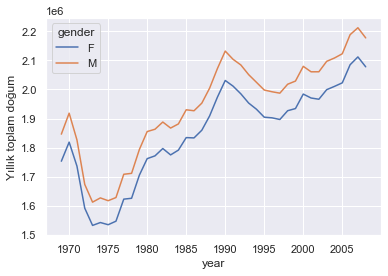

In [36]:
sns.set()
doğum.pivot_table("births", index="year",columns="gender",
                  aggfunc="sum").plot()
plt.ylabel("Yıllık toplam doğum")